In [1]:
from numpy.random import default_rng
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import plotly.express as px
import plotly.graph_objects as go
from sklearn.neighbors import NearestNeighbors

import scanpy as sc
import squidpy as sq
from anndata import AnnData
import pandas as pd
import PIL
from PIL import Image
import numpy as np

import json

import warnings

warnings.filterwarnings('ignore')

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

/nethome/anastasiya.kazachenk/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


scanpy==1.10.1 anndata==0.10.7 umap==0.5.6 numpy==1.23.4 scipy==1.11.1 pandas==2.2.2 scikit-learn==1.3.0 statsmodels==0.14.0 igraph==0.11.4 pynndescent==0.5.12
squidpy==1.4.1


In [2]:
full = pd.read_csv("/nethome/anastasiya.kazachenk/Projects/Ultivue/Immune_Panel_Cell_Objects_Data/modified/modified_USL-2023-53533_2.csv")

features_df = full.iloc[:, 12:20]
features = features_df.to_numpy()

coordinates = full.iloc[:, 0:2]
coordinates = coordinates.to_numpy()
## Invert the two columns
coordinates = coordinates[:, [0, 1]]

# Create AnnData object

adata = AnnData(features, obsm={"spatial": coordinates})
adata.obs["Tissue_type"] = full["marker_tissuetype"].to_numpy()
adata.obs["MECA79"] = full["MECA79"].to_numpy()
adata.obs["IL7R"] = full["IL7R"].to_numpy()
adata.obs["CD56"] = full["CD56"].to_numpy()
adata.obs["CD163"] = full["CD163"].to_numpy()
adata.obs["CD20"] = full["CD20"].to_numpy()
adata.obs["CD3"] = full["CD3"].to_numpy()
adata.obs["CD28"] = full["CD28"].to_numpy()
adata.obs["SOX10"] = full["SOX10"].to_numpy()
adata.obs["Cell_phenotype"] = full["cell_phenotype"].to_numpy()
adata.obs["Cell_id"] = full["CellID"].to_numpy()
adata.obs_names = full["CellID"].to_numpy()

In [3]:
sq.gr.spatial_neighbors(adata, coord_type="generic", radius = 75)

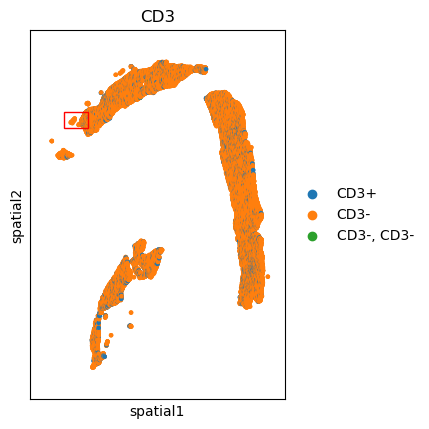

In [11]:
## Graph plot with area highlight

fig, ax = plt.subplots()

sq.pl.spatial_scatter(
    adata,
    color="CD3",
    connectivity_key="spatial_connectivities",
    edges_color="black",
    shape=None,
    edges_width=.5,
    size=20,
    ax=ax
)

xmin, ymin, xmax, ymax = 4000, 5200,5500,6200

rect = patches.Rectangle((xmin,ymin), xmax-xmin, ymax-ymin, linewidth=1, edgecolor='r', facecolor='none')

ax.add_patch(rect)

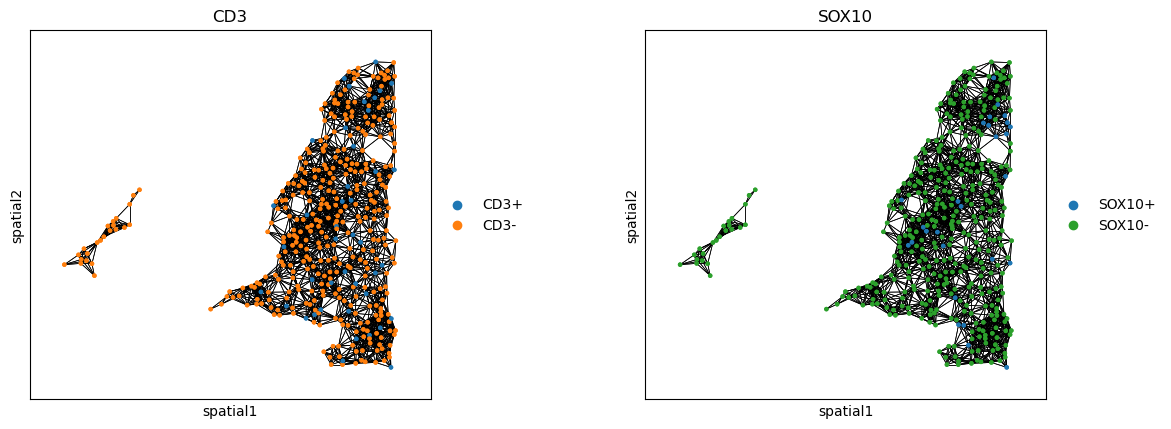

In [10]:
# Graph plot of the area itself

xmin, ymin, xmax, ymax = 4000, 5200,5500,6200

sq.pl.spatial_scatter(
    adata,
    color=["CD3","SOX10"],
    connectivity_key="spatial_connectivities",
    edges_color="black",
    shape=None,
    edges_width=.5,
    size=20,
    crop_coord=(xmin, ymin, xmax, ymax)
)